<a href="https://colab.research.google.com/github/varna86/hello_world/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. What are is the problem that is being solved?**


A major US bank is looking to grow its loan based business and generate revenues on the interest of these loans. The goal is to explore all of their current customers and shift the business to be primarily loan based. 

**Task:** use machine learning to identify customers who are more likely to purchase a loan from the bank.

**Means:** utilize Logistic Regression and Decision Trees to create an projected outcome of whether a given customer will purchase or will not purchase a loan.

**2. Features:**

1. ID - unique customer identifyer
2. Age - customer age
3. Experience - years of work experience
4. Income - annual customer income ($K)
5. ZIP Code - customer zip code (living)
6. Family - size of household 
7. CCAvg - average monthly credit card spend 
8. Education - 1: Undergrad / 2: Grad / 3: Higher+
9. Mortgage - Morgage value
10. Personal Loan - Y/N whether or not they took one in last campaign
11. Securities Account - Y/N to existing securities account 
12. CD_Account - Y/N to existing CD account
13. Online - Y/N to use of internet banking
14. CreditCard - Y/N to existing other credit cards


**3. Goal**

* Predict whether a customer will take the loan offer or not
* What are the variables that will contribute to the customer taking the offer
* Which customers should be offered a loan and which ones should not be 
* What are the demographic factors that will contribute to a customer taking a loan offer

**4. Import Libraries**

In [ ]:
!pip install zipcodes
## one of the columns has zip codes - this library will link zipcode to county name

     |████████████████████████████████| 727kB 4.3MB/s 


**Key to this step:**  one of the columns has zip codes - this library will link zipcode to county name

In [ ]:
import sys
sys.setrecursionlimit(1500)

**Key to this step:** I got several errors on recursion limits so this step increases the recursions

In [ ]:
import scipy as sts 

import pandas as pd
import numpy as np
import zipcodes as zc

import matplotlib.pyplot as plt
%matplotlib inline
## plot outputs appear and are stored within the notebook
import seaborn as sns
import warnings

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore') 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Key to this step:** Import all the needed libraries 

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
## mount gdrive to get the data

Mounted at /content/gdrive


**Key to this step:** Mount my gdrive where my data is saved so I can later read the file 

**5. Import Data**

In [ ]:
path_to_data= '/content/gdrive/My Drive/Bank_Personal_Loan_Modelling.csv'

**Key to this step:** Define the path to the data in the gdrive

In [ ]:
df=pd.read_csv(path_to_data)


**Key to this step:** Read the data 

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**Key to this step:** Check what my data looks like 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Key to this step:** Check for nulls and data types

In [ ]:
df.nunique()
## check the number of unique values in each column to identy binary & categorical columns

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

**Key to this step:** Check unique value counts for each variable in the data set 

In [ ]:
df.drop(['ID'],axis=1,inplace=True)

**Key to this step:** Drop the ID column since it is not needed for the analysis

In [ ]:
df.rename(columns={"ZIP Code":"ZIP_Code","Personal Loan":"Personal_Loan","Securities Account":"Securities_Account","CD Account":'CD_Account'},inplace=True)

**Key to this step:** Rename the column names with underscores for ease of working with the model 

In [ ]:
zipcodeslist=df.ZIP_Code.unique()

**Key to this step:** get a list of unique zip codes

In [ ]:
print(zipcodeslist)

[91107 90089 94720 94112 91330 92121 91711 93943 93023 94710 90277 93106
 94920 91741 95054 95010 94305 91604 94015 90095 91320 95521 95064 90064
 94539 94104 94117 94801 94035 92647 95814 94114 94115 92672 94122 90019
 95616 94065 95014 91380 95747 92373 92093 94005 90245 95819 94022 90404
 93407 94523 90024 91360 95670 95123 90045 91335 93907 92007 94606 94611
 94901 92220 93305 95134 94612 92507 91730 94501 94303 94105 94550 92612
 95617 92374 94080 94608 93555 93311 94704 92717 92037 95136 94542 94143
 91775 92703 92354 92024 92831 92833 94304 90057 92130 91301 92096 92646
 92182 92131 93720 90840 95035 93010 94928 95831 91770 90007 94102 91423
 93955 94107 92834 93117 94551 94596 94025 94545 95053 90036 91125 95120
 94706 95827 90503 90250 95817 95503 93111 94132 95818 91942 90401 93524
 95133 92173 94043 92521 92122 93118 92697 94577 91345 94123 92152 91355
 94609 94306 96150 94110 94707 91326 90291 92807 95051 94085 92677 92614
 92626 94583 92103 92691 92407 90504 94002 95039 94

**Key to this step:** Print the list just to spot check for any irregularities 

In [ ]:
zipcodes={}
for zipcode in zipcodeslist:
    counties = zc.matching(zipcode.astype('str'))
    if len(counties)==1: 
        county=counties[0].get('county')
    else:
        county=zipcode
    
    zipcodes.update({zipcode:county})

**Key to this step:** Match the zip code with the corresponding county 

In [ ]:
zipcodes2={}
for zipcode in zipcodeslist:
    cities = zc.matching(zipcode.astype('str'))
    if len(cities)==1: 
        city=cities[0].get('city')
    else:
        city=zipcode
    
    zipcodes2.update({zipcode:city})

    ## matches the zip code with the county it belongs to
      

**Key to this step:** Match the zip code with the corresponding city 

In [ ]:
zipcodes

{9307: 9307,
 90005: 'Los Angeles County',
 90007: 'Los Angeles County',
 90009: 'Los Angeles County',
 90011: 'Los Angeles County',
 90016: 'Los Angeles County',
 90018: 'Los Angeles County',
 90019: 'Los Angeles County',
 90024: 'Los Angeles County',
 90025: 'Los Angeles County',
 90027: 'Los Angeles County',
 90028: 'Los Angeles County',
 90029: 'Los Angeles County',
 90032: 'Los Angeles County',
 90033: 'Los Angeles County',
 90034: 'Los Angeles County',
 90035: 'Los Angeles County',
 90036: 'Los Angeles County',
 90037: 'Los Angeles County',
 90041: 'Los Angeles County',
 90044: 'Los Angeles County',
 90045: 'Los Angeles County',
 90048: 'Los Angeles County',
 90049: 'Los Angeles County',
 90057: 'Los Angeles County',
 90058: 'Los Angeles County',
 90059: 'Los Angeles County',
 90064: 'Los Angeles County',
 90065: 'Los Angeles County',
 90066: 'Los Angeles County',
 90068: 'Los Angeles County',
 90071: 'Los Angeles County',
 90073: 'Los Angeles County',
 90086: 'Los Angeles County

**Key to this step:** Spot check the county zip codes for any irregularities

In [ ]:
zipcodes2

{9307: 9307,
 90005: 'Los Angeles',
 90007: 'Los Angeles',
 90009: 'Los Angeles',
 90011: 'Los Angeles',
 90016: 'Los Angeles',
 90018: 'Los Angeles',
 90019: 'Los Angeles',
 90024: 'Los Angeles',
 90025: 'Los Angeles',
 90027: 'Los Angeles',
 90028: 'Los Angeles',
 90029: 'Los Angeles',
 90032: 'Los Angeles',
 90033: 'Los Angeles',
 90034: 'Los Angeles',
 90035: 'Los Angeles',
 90036: 'Los Angeles',
 90037: 'Los Angeles',
 90041: 'Los Angeles',
 90044: 'Los Angeles',
 90045: 'Los Angeles',
 90048: 'Los Angeles',
 90049: 'Los Angeles',
 90057: 'Los Angeles',
 90058: 'Los Angeles',
 90059: 'Los Angeles',
 90064: 'Los Angeles',
 90065: 'Los Angeles',
 90066: 'Los Angeles',
 90068: 'Los Angeles',
 90071: 'Los Angeles',
 90073: 'Los Angeles',
 90086: 'Los Angeles',
 90089: 'Los Angeles',
 90095: 'Los Angeles',
 90210: 'Beverly Hills',
 90212: 'Beverly Hills',
 90230: 'Culver City',
 90232: 'Culver City',
 90245: 'El Segundo',
 90250: 'Hawthorne',
 90254: 'Hermosa Beach',
 90266: 'Manhattan

**Key to this step:** Spot check the city zip codes for any irregularities

In [ ]:
zipcodes.update({92717:'Orange County'})
zipcodes.update({92634:'Orange County'})
zipcodes.update({96651:'San Diego County'})
zipcodes2.update({92717:'Irvine'})
zipcodes2.update({92634:'Fullerton'})
zipcodes2.update({96651:'San Diego'})

**Key to this step:** Assign a county and city to the zip codes that were not matched

In [ ]:
df['County']=df['ZIP_Code'].map(zipcodes)

**Key to this step:** Add the county coumn to the df

In [ ]:
df['City']=df['ZIP_Code'].map(zipcodes2)
## get the cities added to the df

**Key to this step:** Add the city column to the df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP_Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  County              5000 non-null   object 
 14  City                5000 non-null   object 
dtypes: float64(1), int64(12), object(2)
memory usage: 586.1

**Key to this step:** Spot check the data to make sure that there are no missing values 

In [ ]:
df.County.nunique()

39

**Key to this step:** Check number of unique counties

In [ ]:
df.City.nunique()

245

**Key to this step:** Check number of unique cities

In [ ]:
df.head()

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,City
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County,Pasadena
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County,Los Angeles
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County,Berkeley
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County,San Francisco
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County,Northridge


**Key to this step:** Spot check the first 5 rows of the data to study what the data looks like 

In [ ]:
categories = ['Personal_Loan', 'Securities_Account','Family', 'CD_Account', 'Online', 'CreditCard', 'ZIP_Code', 'Education','County']
df[categories] = df[categories].astype('category') 

**Key to this step:** Convert to ctaegory type for performance optmization 

In [ ]:
df.describe()


,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937938,56.498800
std,11.463166,11.467954,46.033729,1.747659,101.713802
min,23.000000,-3.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000


**Key to this step:** 
1. The numerical features are : age , experience , income , ccavg , mortgage 
2. Check for value abnormalities - values look ok with the exception of experience which has negative values which is impossible --> convert those to 0 to eliminate the negative

In [ ]:
df.loc[df['Experience']<0,'Experience']=0

**Key to this step:** Set experience to 0 when it is negative

In [ ]:
categories_list = ['Personal_Loan', 'Securities_Account','Family', 'CD_Account', 'Online', 'CreditCard', 'ZIP_Code', 'Education','County','City']
for category in categories_list:
    print((df[category].value_counts()/df[category].count())*100)

0    90.4
1     9.6
Name: Personal_Loan, dtype: float64
0    89.56
1    10.44
Name: Securities_Account, dtype: float64
1    29.44
2    25.92
4    24.44
3    20.20
Name: Family, dtype: float64
0    93.96
1     6.04
Name: CD_Account, dtype: float64
1    59.68
0    40.32
Name: Online, dtype: float64
0    70.6
1    29.4
Name: CreditCard, dtype: float64
94720    3.38
94305    2.54
95616    2.32
90095    1.42
93106    1.14
         ... 
92694    0.02
94965    0.02
94970    0.02
91024    0.02
9307     0.02
Name: ZIP_Code, Length: 467, dtype: float64
1    41.92
3    30.02
2    28.06
Name: Education, dtype: float64
Los Angeles County        21.90
San Diego County          11.48
Santa Clara County        11.26
Alameda County            10.00
Orange County              7.32
San Francisco County       5.14
San Mateo County           4.08
Sacramento County          3.68
Santa Barbara County       3.08
Yolo County                2.60
Monterey County            2.56
Ventura County             2.28
Sa

**Key to this step:** Get distribution of values for each feature in percentages to check for any issues in the data set that might impact the study

In [ ]:
df.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.119600,73.774200,1.937938,56.498800
std,11.463166,11.440484,46.033729,1.747659,101.713802
min,23.000000,0.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000


**Key to this step:** 
Findings:
1.   Age , Experience , Income , CCAvg , Mortgage are numerical values
2.   Mean age of customer is 45 years / Avg Experience 20 years / Avg Income 46Thousand / Average CC Spend approx 2Thousan / Average Mortgage 57Thousand
3. The min and max values seem reasonable
4. There seem to be some outliers on the Mortgage and it seems like the Mortgage column has mostly 0 values (this column will likely not be useful as I am not sure whether it indicates that the customer has no mortgage or has no mortgage with the bank - it is unlikely that most people dont have mortgage given normal conditions)








In [ ]:
def dist_box(data):
    Name=data.name.upper()
    fig,(ax_box,ax_dis)=plt.subplots(nrows=2,sharex=True)
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]

    sns.set_theme(style="white")
    fig.suptitle("Boxplot for "+ Name , fontsize=14)
    sns.boxplot(x=data,showmeans=True, orient='v',color="white",ax=ax_box)
  
    sns.distplot(data,kde=False,color='green',ax=ax_dis)
    ax_dis.axvline(mean, color='b', linewidth=3)
    ax_dis.axvline(median, color='y',linewidth=3)
    ax_dis.axvline(mode, color='r',linewidth=3)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})                 

**Key to this step:** Define a function to get the box plot and distribution of the mean median and mode of the data

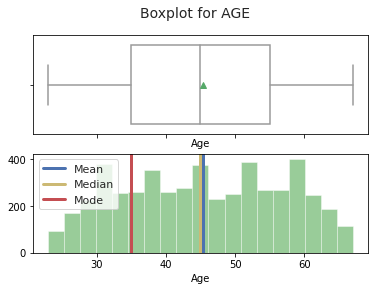

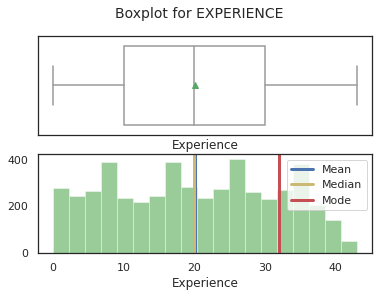

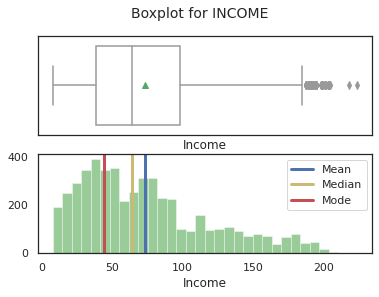

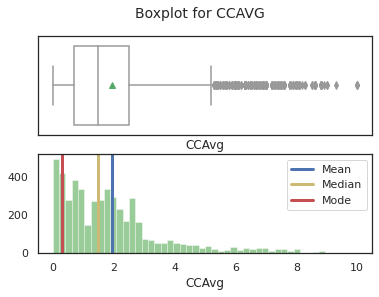

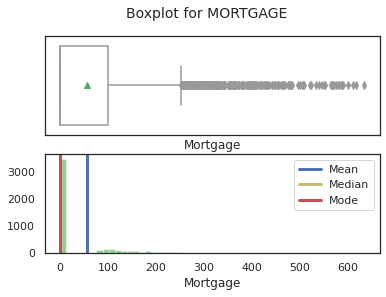

In [ ]:
numeric_variables=  ['Age','Experience','Income','CCAvg','Mortgage']
for i in range(len(numeric_variables)):
    dist_box(df[numeric_variables[i]])

**Key to this step:** 
1. Visualize the box plots and distribution diagrams 
2. From the data we see that CCAvg and Income are somewhat skewed but for now I will leave this data as is 
2.   Income and Age are ok to proceed with the study
1.   Mortgage has some outliers but more than 50% of the data is 0 so I will probably not use this feature altogether






In [ ]:
Age_Labels = ['Group 1: 20+','Group 2: 35+','Group 3: 45+','Group 4: 55+']
df['Age_Grouped'] = pd.qcut(df['Age'], q=4, labels=Age_Labels )

## split the age data into 4 bins

**Key to this step:** Split the age columns into 4 bins and assign the labels based on what the data looks like 

In [ ]:
df.groupby(['Age_Grouped'])['Age'].describe().T

Age_Grouped,Group 1: 20+,Group 2: 35+,Group 3: 45+,Group 4: 55+
count,1274.000000,1245.000000,1265.000000,1216.000000
mean,30.459184,40.678715,50.596047,60.228618
std,3.178183,2.803518,2.856895,2.907977
min,23.000000,36.000000,46.000000,56.000000
25%,28.000000,38.000000,48.000000,58.000000
50%,31.000000,41.000000,51.000000,60.000000
75%,33.000000,43.000000,53.000000,62.000000
max,35.000000,45.000000,55.000000,67.000000


**Key to this step:** Describe the age bins and check whether they make sense

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP_Code            5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  County              5000 non-null   category
 14  City                5000 non-null   object  
 15  Age_Grouped         5000 non-null   ca

**Key to this step:** Check the df to ensure that the column is there and that everything looks ok

In [ ]:
df.head()

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,City,Age_Grouped
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County,Pasadena,Group 1: 20+
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County,Los Angeles,Group 2: 35+
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County,Berkeley,Group 2: 35+
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County,San Francisco,Group 1: 20+
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County,Northridge,Group 1: 20+


**Key to this step:** Sample the df to see how it how the new column appears

In [ ]:
Income_Labels = ['Low: <$33','Low-Med: <$52','Med: <$78','Med-High: <$113','High: >$113']
df['Income_Grouped'] = pd.qcut(df['Income'], q=5, labels=Income_Labels )

**Key to this step:** Split the income into 5 bins to differentiate income levels and assign labels based on the value buckets

In [ ]:
df.groupby(['Income_Grouped'])['Income'].describe().T

Income_Grouped,Low: <$33,Low-Med: <$52,Med: <$78,Med-High: <$113,High: >$113
count,1029.000000,973.000000,1017.000000,1002.000000,979.000000
mean,22.485909,42.594039,64.719764,91.383234,150.054137
std,7.168555,5.047577,7.379420,10.524072,24.900171
min,8.000000,34.000000,53.000000,79.000000,114.000000
25%,18.000000,39.000000,59.000000,82.000000,129.000000
50%,23.000000,42.000000,64.000000,89.000000,145.000000
75%,29.000000,45.000000,71.000000,99.000000,171.000000
max,33.000000,52.000000,78.000000,113.000000,224.000000


**Key to this step:** Check the data in each bin to understand the distribution 

In [ ]:
CCAvg_Labels =  ['Low: <$.75K','Med: <$1.5K','Med-High: <$2.5K','High: >$2.5K']
df['CCAvg_Grouped'] = pd.qcut(df['CCAvg'], q=4, labels=CCAvg_Labels )

**Key to this step:** Split the CC average spend into 4 bins and assign labels based on the bins

In [ ]:
df.groupby(['CCAvg_Grouped'])['CCAvg'].describe().T

CCAvg_Grouped,Low: <$.75K,Med: <$1.5K,Med-High: <$2.5K,High: >$2.5K
count,1381.000000,1134.000000,1237.000000,1248.000000
mean,0.351673,1.137672,2.010226,4.348766
std,0.214758,0.248294,0.276893,1.694163
min,0.000000,0.750000,1.600000,2.600000
25%,0.200000,0.900000,1.800000,2.900000
50%,0.300000,1.100000,2.000000,3.800000
75%,0.500000,1.400000,2.200000,5.400000
max,0.700000,1.500000,2.500000,10.000000


**Key to this step:** Check the distribution of the CC Avg new column to make sure there are no irregularities 

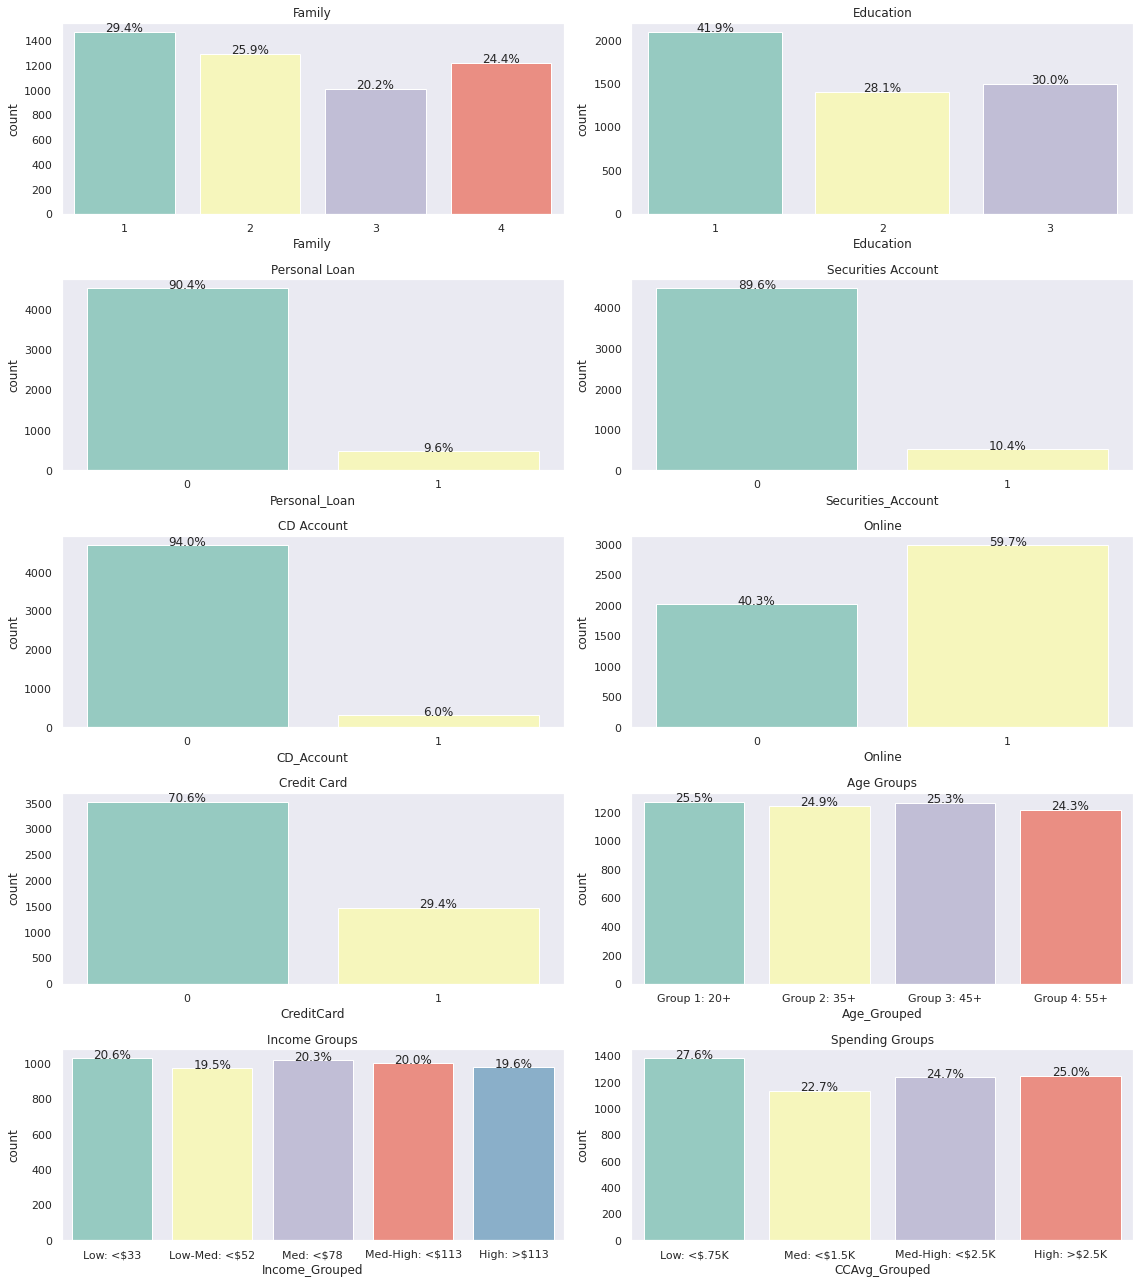

In [ ]:
categories_list_2 = ['Family','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard','Age_Grouped','Income_Grouped','CCAvg_Grouped']
title=['Family','Education','Personal Loan', 'Securities Account','CD Account','Online','Credit Card','Age Groups',"Income Groups",'Spending Groups']
plt.figure(figsize=(16 ,18))

sns.set_theme(style="dark")

for i, variable in enumerate(categories_list_2):
                     plt.subplot(5,2,i+1)  
                     sns.set_palette('Set3')
                     ax=sns.countplot(x=df[variable], data=df )
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[variable]))
                           x = p.get_x() + p.get_width()  / 2
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i])

**Key to this step:** Visualize the columns in percetages to check for any insights
1. It apperas that only 9.6% have a personal loan, 10.4% have a securities account and only 29.4% have a CC with the bank - all three fields can be an area of opportunity in the future

In [ ]:
counties = {
'Los Angeles County':'Los Angeles',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',            
'Ventura County':'Southern',             
'San Bernardino County':'Southern',       
'Contra Costa County':'Bay Area',        
'Santa Cruz County':'Bay Area',           
'Riverside County':'Southern',            
'Kern County':'Southern',                 
'Marin County':'Bay Area',                
'San Luis Obispo County':'Southern',     
'Solano County':'Bay Area',              
'Humboldt County':'Superior',            
'Sonoma County':'Bay Area',                
'Fresno County':'Central',               
'Placer County':'Central',                
'Butte County':'Superior',               
'Shasta County':'Superior',                
'El Dorado County':'Central',             
'Stanislaus County':'Central',            
'San Benito County':'Bay Area',          
'San Joaquin County':'Central',           
'Mendocino County':'Superior',             
'Tuolumne County':'Central',                
'Siskiyou County':'Superior',              
'Trinity County':'Superior',                
'Merced County':'Central',                  
'Lake County':'Superior',                 
'Napa County':'Bay Area',                   
'Imperial County':'Southern',
93077:'Los Angeles',
9307:'Los Angeles',
96651:'Southern',
92717:'Southern'}

**Key to this step:** Since there are too many counties Use https://www.calbhbc.org/region-map-and-listing.html to assign region to the counties

In [ ]:
df['Regions'] = df['County'].map(counties)

**Key to this step:** Add the region previously assigned to the county to the dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP_Code            5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  County              5000 non-null   category
 14  City                5000 non-null   object  
 15  Age_Grouped         5000 non-null   ca

**Key to this step:** Check to make sure that the region column is there and has no missing values

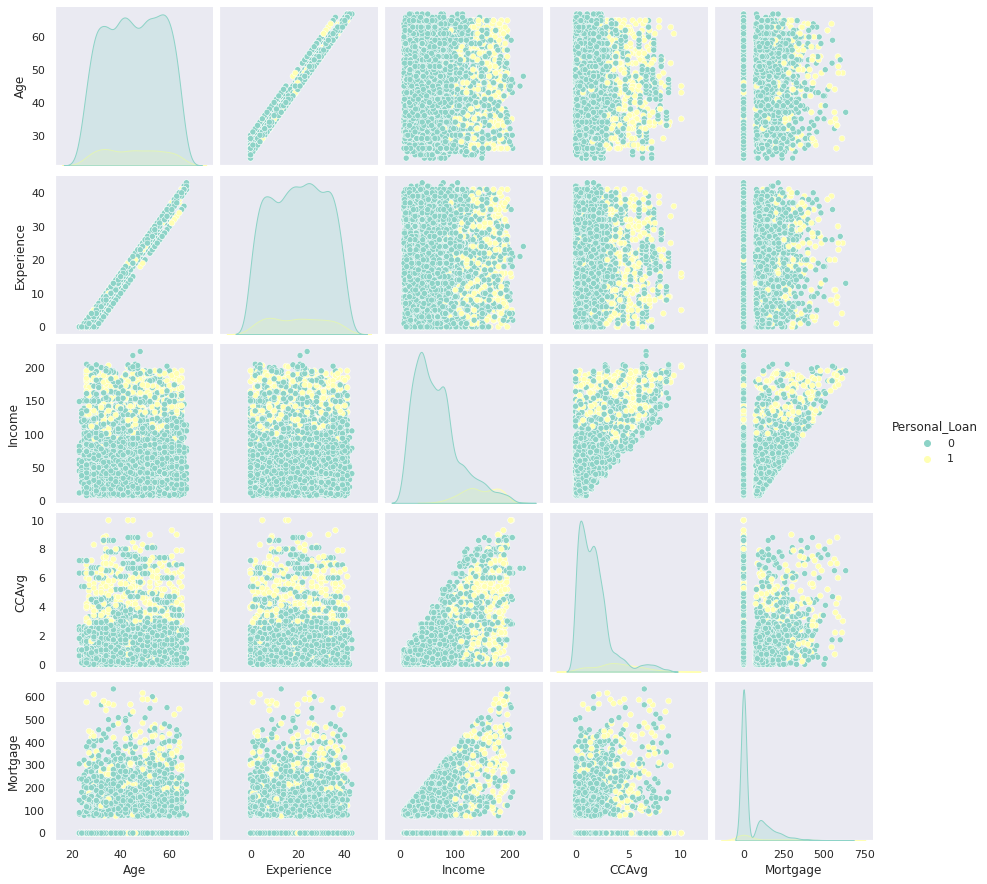

In [ ]:
sns.set_palette(sns.color_palette("Set3", 12))
sns.pairplot(df, hue="Personal_Loan",corner=False)
plt.show()

**Key to this step:** Study the relationships between the variables and indicate in yellow the records that took a personal loan
1. It appears that personal loans are usually taken from people from higher income and higher cc spend - these two fields will likely be a contributing factor


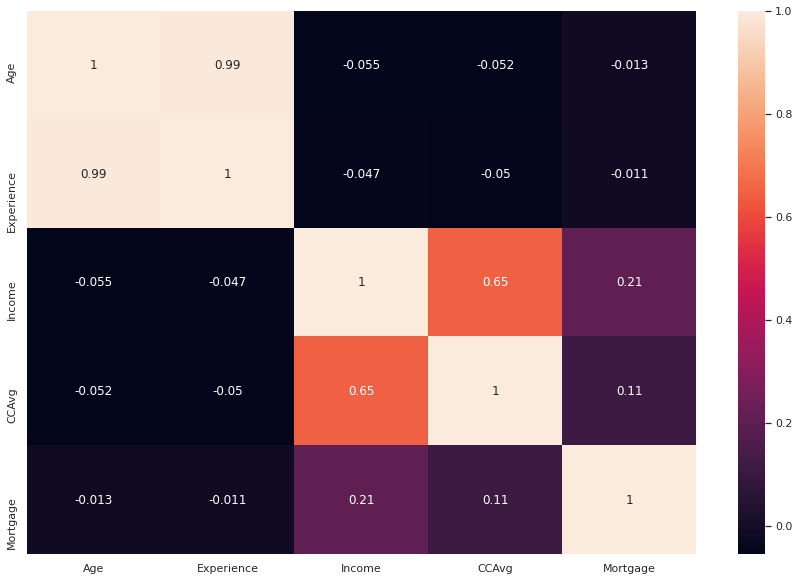

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()


**Key to this step:** Perform a correlation study
1. Age and experience have a strong correlation naturally and as expected
2. There is correlation between income and average cc spend
3. For all other variables there seems to be no correlation

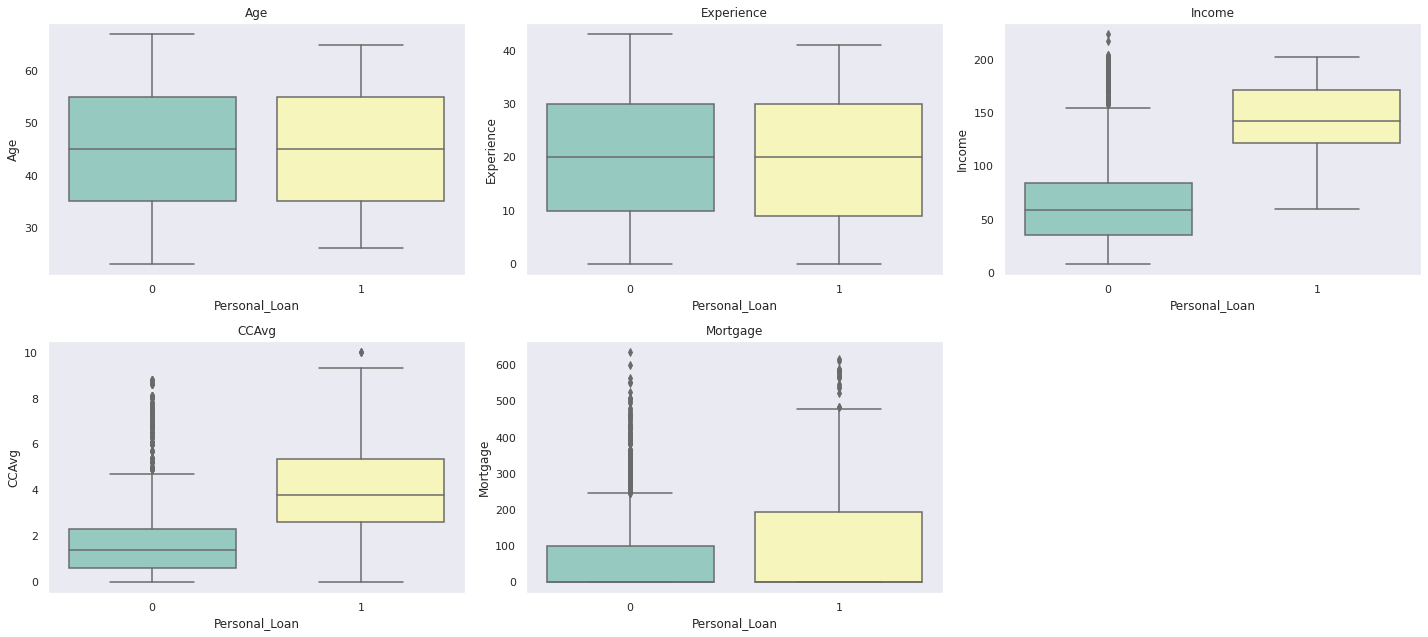

In [ ]:
study_set = ['Age','Experience','Income','CCAvg','Mortgage']
plt.figure(figsize=(20,35))
sns.set_palette(sns.color_palette("Set3", 10))

for i, variable in enumerate(study_set):
        plt.subplot(8,3,i+1)
        sns.boxplot(x='Personal_Loan',y= df[variable], data=df)     
        plt.tight_layout()
        plt.title(variable)


## display boxplots for the 5 numeric variables: age and experience are ok, there are some outliers for income, CCAvg and Mortgage

**Key to this step:** Vusualize the box plots once again and decide whether i will do anything with the outliers - I have decided to leave the data as is as while there are outliers it is not significantly skewed

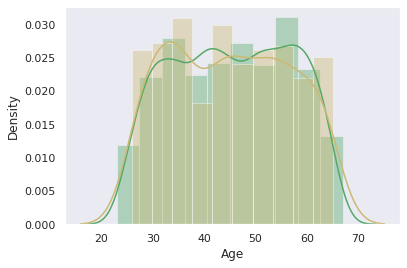

In [ ]:
sns.distplot( df[df['Personal_Loan'] == 0]['Age'], color = 'g',bins=10)
sns.distplot( df[df['Personal_Loan'] == 1]['Age'], color = 'y',bins=10)

## there does not seem to be a difference in age trends between the two groups 

**Key to this step:** Visualize the variables in by target for each category. 
From this visual it does seem like younger people might be more likely to take personal loan.

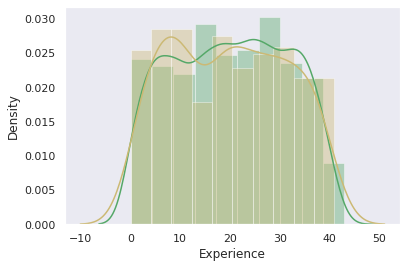

In [ ]:
sns.distplot( df[df['Personal_Loan'] == 0]['Experience'], color = 'g',bins=10)
sns.distplot( df[df['Personal_Loan'] == 1]['Experience'], color = 'y',bins=10)

## there does not seem to be a difference in age trends between the two groups 

**Key to this step:** Visualize the variables in by target for each category. 
From this visual it does seem like people with less experience might be more likely to take personal loan but it is not as evident as the previous graph with age.

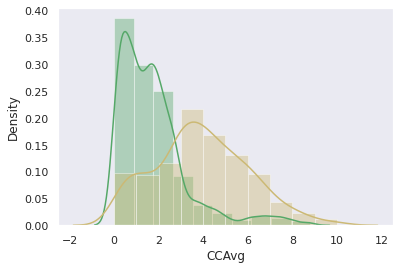

In [ ]:
sns.distplot( df[df['Personal_Loan'] == 0]['CCAvg'], color = 'g', bins=10, label='No Personal Loan')
sns.distplot( df[df['Personal_Loan'] == 1]['CCAvg'], color = 'y',bins=10, label='Took Personal Loan')

**Key to this step:** Visualize the variables in by target for each category. 
From this visual it does seem like people who did not take a personal loan generally had lower cc spend.

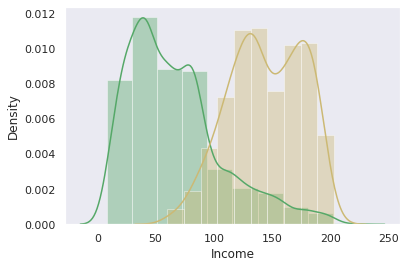

In [ ]:
sns.distplot( df[df['Personal_Loan'] == 0]['Income'], color = 'g',bins=10)
sns.distplot( df[df['Personal_Loan'] == 1]['Income'], color = 'y',bins=10)

**Key to this step:** Visualize the variables in by target for each category. 
From this visual it does seem like people who did not take a personal loan generally had lower income.

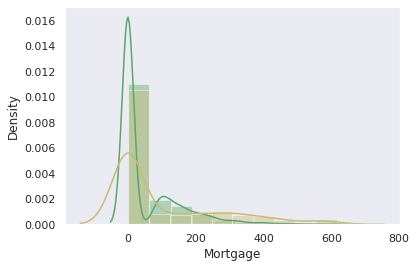

In [ ]:
sns.distplot( df[df['Personal_Loan'] == 0]['Mortgage'], color = 'g',bins=10)
sns.distplot( df[df['Personal_Loan'] == 1]['Mortgage'], color = 'y',bins=10)


**Key to this step:** Visualize the variables in by target for each category. 
From this visual it does seem like most of the mortgages are 0 which makes this column relative unuseful. 

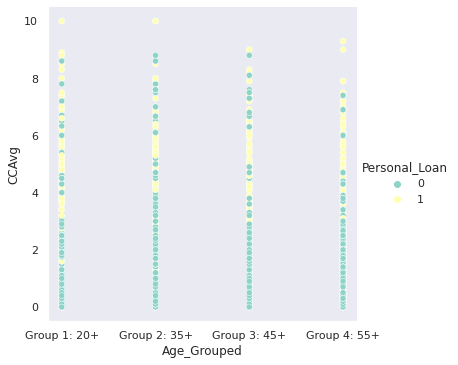

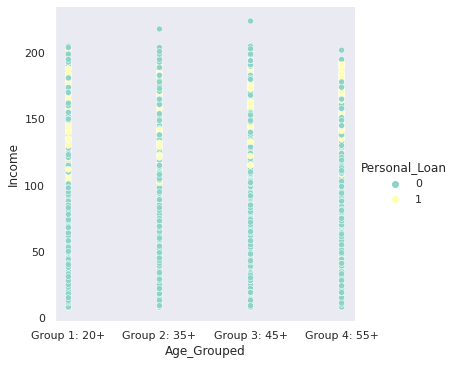

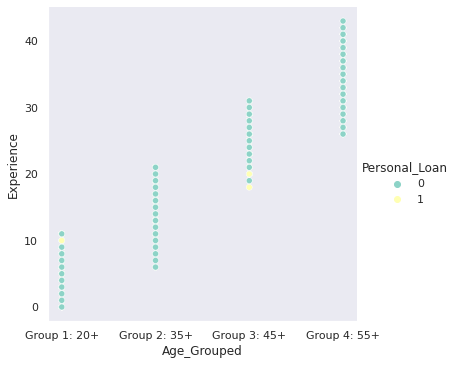

In [ ]:
sns.relplot(x='Age_Grouped',y='CCAvg',hue='Personal_Loan',data=df) ## Group 1 - youngest seem to have slightly more prevealence in loan taking 
sns.relplot(x='Age_Grouped',y='Income',hue='Personal_Loan',data=df) ## mostly evenly spread
sns.relplot(x='Age_Grouped',y='Experience',hue='Personal_Loan',data=df) ## no indications of trends

**Key to this step:** Visualize the relationship between the variables by target for each category. 
Higher CC Spend is associated with Personal Loans across all age groups - maybe even slightly more at younger individuals. The same is valid for income - warranting CC Avg and Income to be likely very significant in the study.

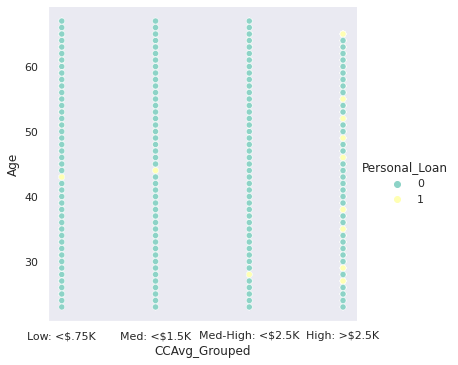

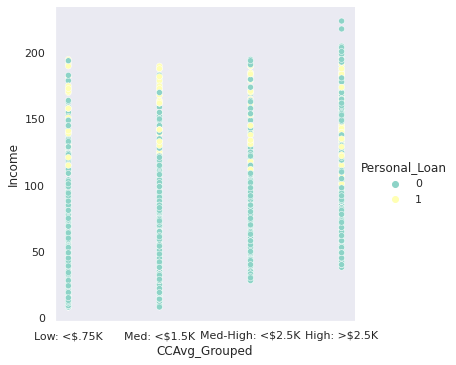

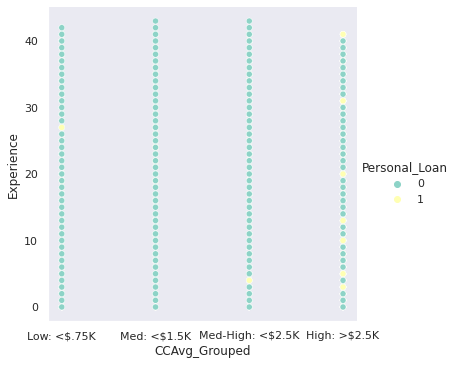

In [ ]:
sns.relplot(x='CCAvg_Grouped',y='Age',hue='Personal_Loan',data=df) ## Group 1 - youngest seem to have slightly more prevealence in loan taking 
sns.relplot(x='CCAvg_Grouped',y='Income',hue='Personal_Loan',data=df) ## mostly evenly spread
sns.relplot(x='CCAvg_Grouped',y='Experience',hue='Personal_Loan',data=df) ## possibly high cc spend and less experience / age

**Key to this step:** Visualize the relationship between the variables by target for each category. 
Higher CC Spend is associated with higher income and higher instances of personal loans - there seems to be a strong correlation between ccavg and income and possibly a multicollinearity. 

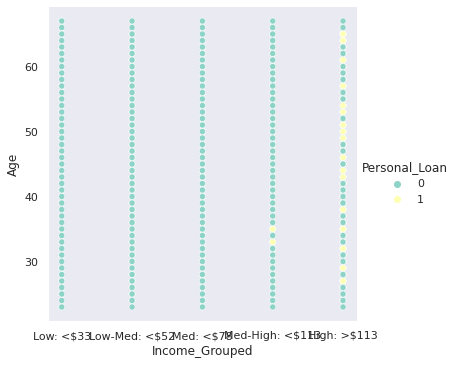

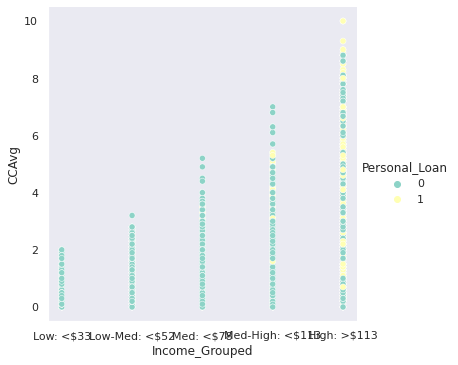

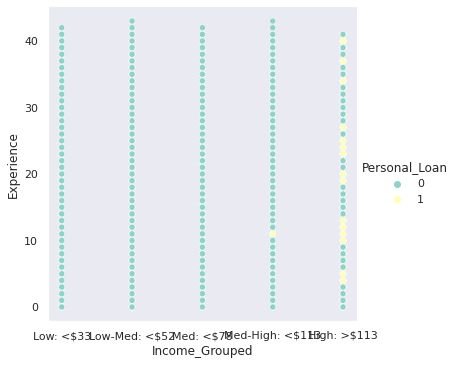

In [ ]:
sns.relplot(x='Income_Grouped',y='Age',hue='Personal_Loan',data=df) ## high income of any age seem to be more likely to take a private loan
sns.relplot(x='Income_Grouped',y='CCAvg',hue='Personal_Loan',data=df) 
sns.relplot(x='Income_Grouped',y='Experience',hue='Personal_Loan',data=df) 

**Key to this step:** Visualize the relationship between the variables by target for each category. 
The previous two findings were confirmed by graphing the data differenty once again to check whether the conclusions we valid.

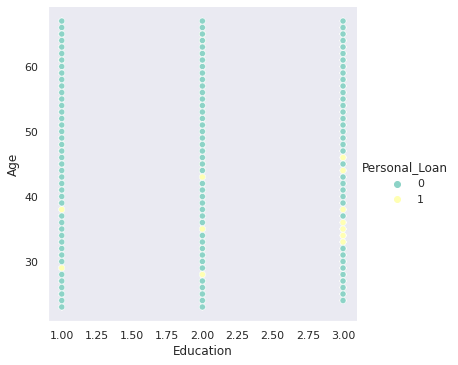

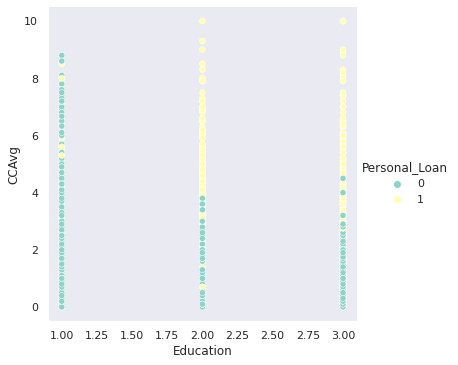

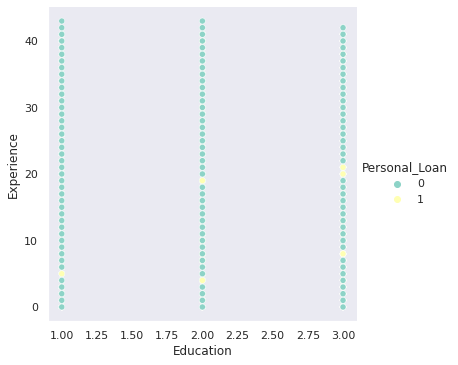

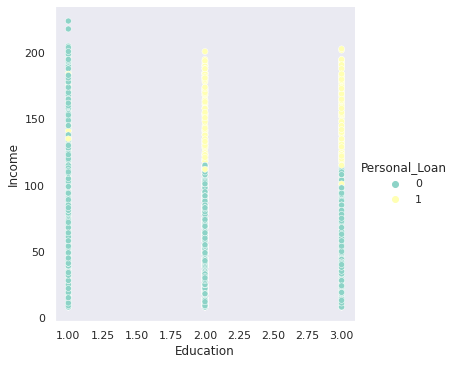

In [ ]:
sns.relplot(x='Education',y='Age',hue='Personal_Loan',data=df) ## higher education is also a possible sign that the customer might take a loan out
sns.relplot(x='Education',y='CCAvg',hue='Personal_Loan',data=df) 
sns.relplot(x='Education',y='Experience',hue='Personal_Loan',data=df) 
sns.relplot(x='Education',y='Income',hue='Personal_Loan',data=df) 

**Key to this step:** Visualize the relationship between the variables by target for each category. 
People with higher education and high income and cc spend were more likely to purchase a personal loan. People with higher education and lower income were not as likely.

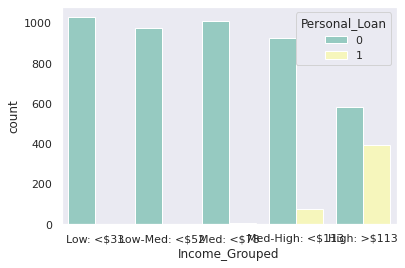

In [ ]:
sns.countplot(x='Income_Grouped',hue='Personal_Loan',data=df)

**Key to this step:** Visualize the relationship between the variables by target for each category. 
High income is a strong predictor of Personal Loan.

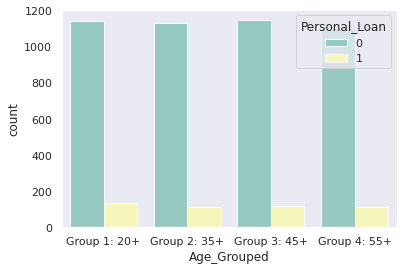

In [ ]:
sns.countplot(x='Age_Grouped',hue='Personal_Loan',data=df)

**Key to this step:** Visualize the relationship between the variables by target for each category. 
Age is possibly not a very strong predictor of Personal Loan.

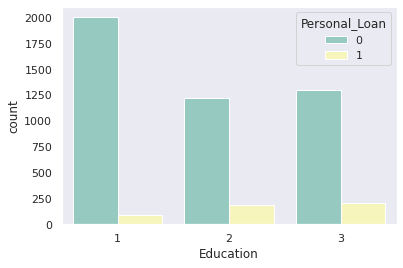

In [ ]:
sns.countplot(x='Education',hue='Personal_Loan',data=df)

**Key to this step:** Visualize the relationship between the variables by target for each category. 
The higher the education the more likely will be that a person will take a personal loan.

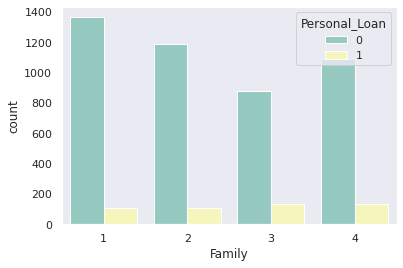

In [ ]:
sns.countplot(x='Family',hue='Personal_Loan',data=df)

**Key to this step:** Visualize the relationship between the variables by target for each category. 
The bigger the family the more likely will be that a person will take a personal loan.

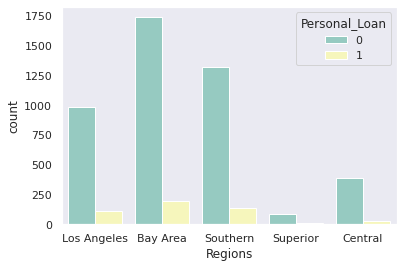

In [ ]:
sns.countplot(x='Regions',hue='Personal_Loan',data=df)

**Key to this step:** Visualize the relationship between the variables by target for each category. 
There seems to not be enough data about smaller regions but also it seems like larger metro areas are associated with personal loan behaviors - likely because they have more wealthy individuals.

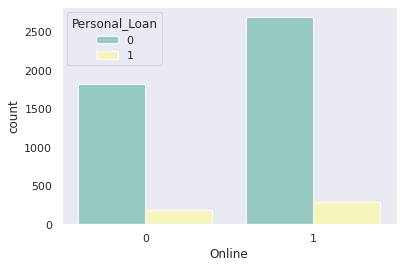

In [ ]:
 sns.countplot(x='Online',hue='Personal_Loan',data=df)

**Key to this step:** Visualize the relationship between the variables by target for each category. 
Unclear whether online banking is associated with personal loans.

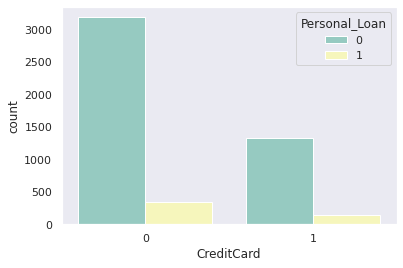

In [ ]:
 sns.countplot(x='CreditCard',hue='Personal_Loan',data=df)

**Key to this step:** Visualize the relationship between the variables by target for each category. 
Unclear whether credit card is associated with personal loans.

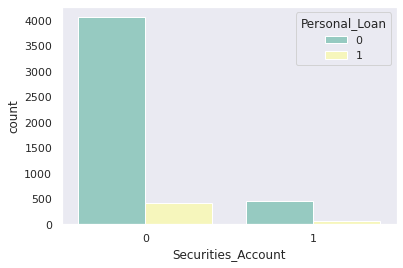

In [ ]:
 sns.countplot(x='Securities_Account',hue='Personal_Loan',data=df)

**Key to this step:** Visualize the relationship between the variables by target for each category. 
Unclear whether securities is associated with personal loans.

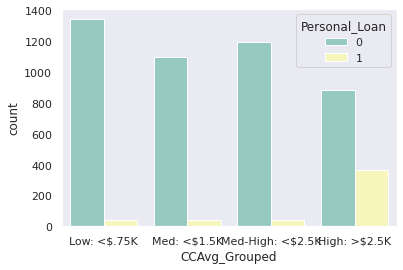

In [ ]:
sns.countplot(x='CCAvg_Grouped',hue='Personal_Loan',data=df)

**Key to this step:** Visualize the relationship between the variables by target for each category. 
Evidently high CC Avg is highly associated with Personal Loans.

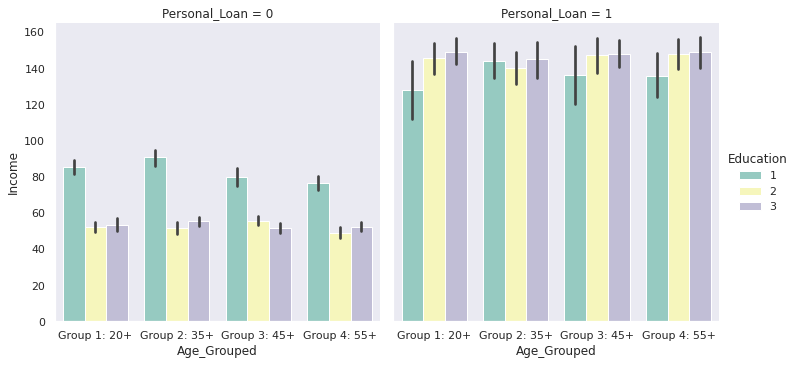

In [ ]:
sns.catplot(y='Income',x='Age_Grouped',hue='Education',kind='bar',col="Personal_Loan", data=df)

**Key to this step:** Visualize the relationship between the variables by target for each category. 
In all age groups people with less education took less Personal Loans, possibly due to lower income and the reverse is also valid for people who had higher education - needs to be checked further by the model.

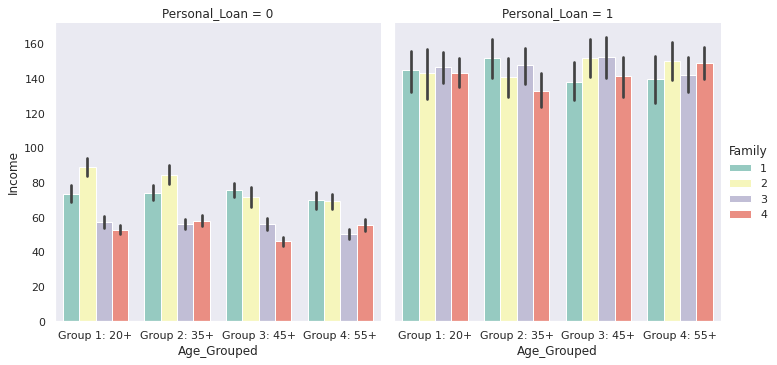

In [ ]:
sns.catplot(y='Income',x='Age_Grouped',hue='Family',kind='bar',col="Personal_Loan", data=df)

**Key to this step:** Visualize the relationship between the variables by target for each category. 
Larger families across each age group are more likely to take a personal loan.

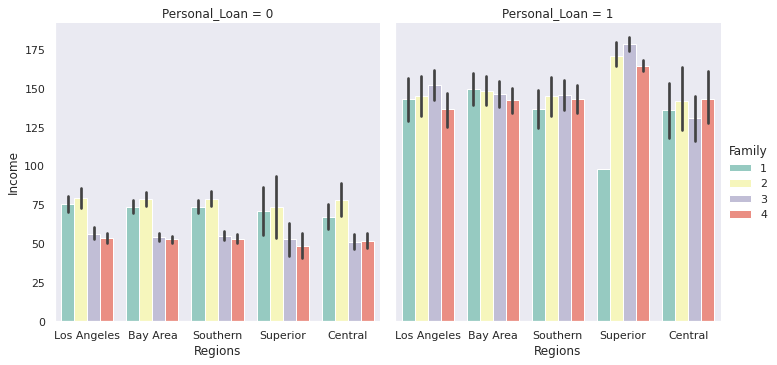

In [ ]:
sns.catplot(y='Income',x='Regions',hue='Family',kind='bar',col="Personal_Loan", data=df)

**Key to this step:** Visualize the relationship between the variables by target for each category. 
There does not seem to be a difference in behavior across the regions with the exception of Superior which does not have enough data points.

In [ ]:
def stacked_plot(x):
    sns.set_palette(sns.color_palette("Set3", 8))
    tab1 = pd.crosstab(x,df['Personal_Loan'],margins=True)
    print(tab1)
    tab = pd.crosstab(x,df['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(8,4))
    plt.legend(loc='lower left', frameon=True,)
    plt.legend(loc="upper left",title="Personal Loan",bbox_to_anchor=(1,1))
    plt.show()

**Key to this step:** Define a function for a stacked graph

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000


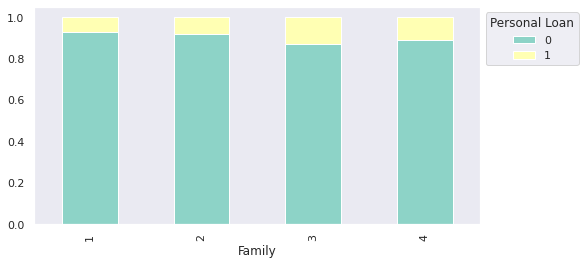

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000


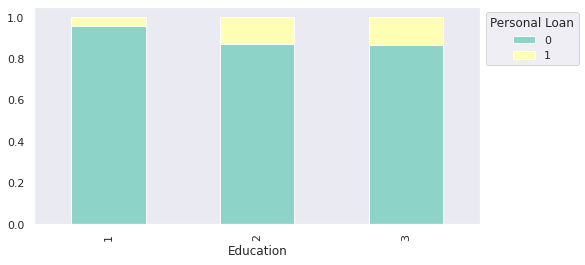

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000


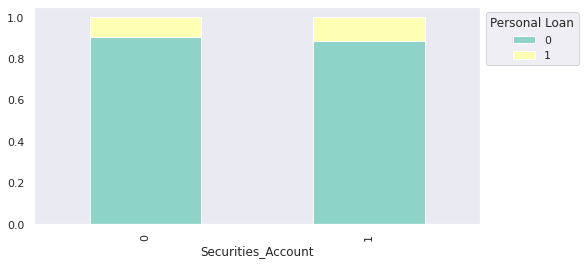

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000


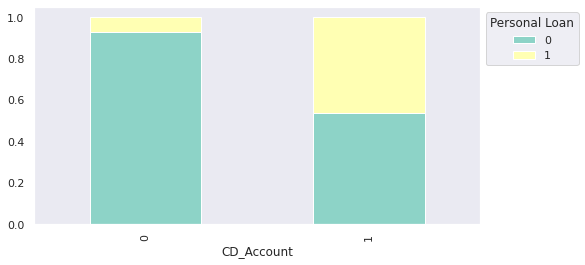

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000


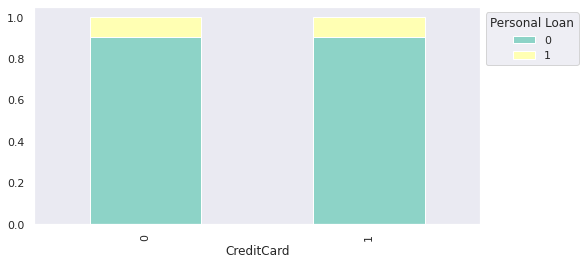

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000


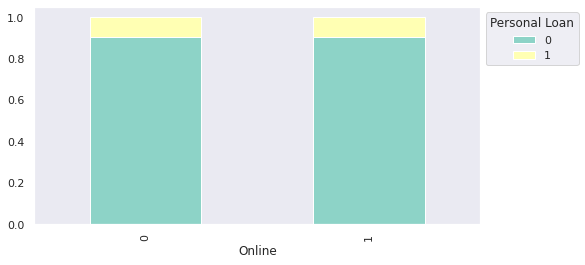

Personal_Loan     0    1   All
Regions                       
Bay Area       1741  196  1937
Central         390   30   420
Los Angeles     985  111  1096
Southern       1320  135  1455
Superior         84    8    92
All            4520  480  5000


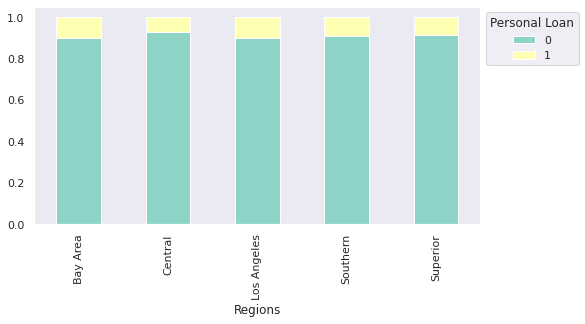

Personal_Loan     0    1   All
Age_Grouped                   
Group 1: 20+   1140  134  1274
Group 2: 35+   1131  114  1245
Group 3: 45+   1147  118  1265
Group 4: 55+   1102  114  1216
All            4520  480  5000


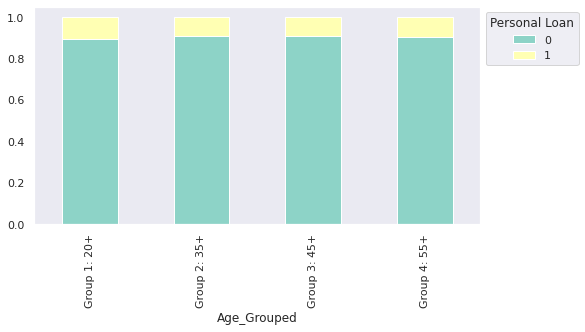

Personal_Loan       0    1   All
Income_Grouped                  
Low: <$33        1029    0  1029
Low-Med: <$52     973    0   973
Med: <$78        1010    7  1017
Med-High: <$113   925   77  1002
High: >$113       583  396   979
All              4520  480  5000


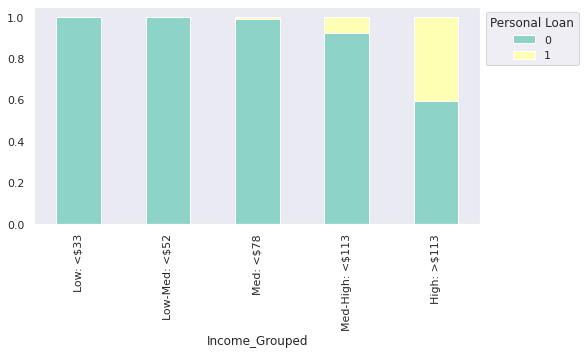

Personal_Loan        0    1   All
CCAvg_Grouped                    
Low: <$.75K       1342   39  1381
Med: <$1.5K       1095   39  1134
Med-High: <$2.5K  1197   40  1237
High: >$2.5K       886  362  1248
All               4520  480  5000


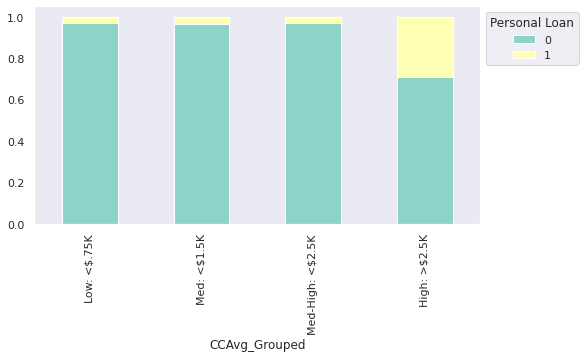

In [ ]:
data_features=['Family','Education','Securities_Account','CD_Account','CreditCard','Online','Regions','Age_Grouped','Income_Grouped','CCAvg_Grouped']
for i, feature in enumerate(data_features):
       stacked_plot(df[feature])

**Key to this step:** Once again it is visiable that High Income and CC Avg , Family , Education and CD Account are contributing factors for Personal Loan.

([<matplotlib.patches.Wedge at 0x7f50a3a45d90>,
 [Text(-1.050350983068654, 0.3267457916587637, ''),
  Text(1.0503509677725784, -0.32674584082924163, '')],
 [Text(-0.5729187180374475, 0.17822497726841657, '90%'),
  Text(0.5729187096941336, -0.17822500408867725, '10%')])

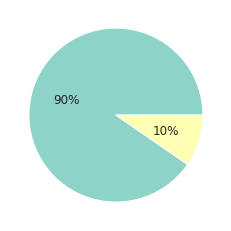

In [ ]:
plt.pie(data=df,x=df["Personal_Loan"].value_counts(),autopct='%1.0f%%')

**Key to this step:** Visualize how big the portion of overal Personal Loan is compared to non Personal Loan.

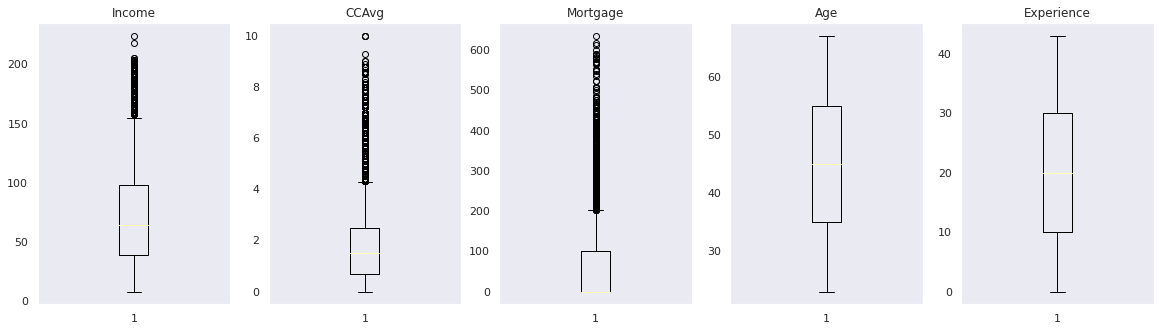

In [ ]:
numeric_columns =['Income','CCAvg','Mortgage','Age','Experience']
plt.figure(figsize=(20,30))

for i, feature in enumerate(numeric_columns):
                     plt.subplot(5,5,i+1)
                     plt.boxplot(df[feature],whis=1)
                     plt.title(feature)

plt.show()

**Key to this step:** Visualize another box plot - clearly the Mortgage column will not be an usefull one. Age and Experience are seem to be good for the study - CC Avg has some outliers but for this round of the study I will leave it as is and check back later.

**6. Perform Logistic Regression**

In [ ]:
df_Copy = df.copy()


**Key to this step:** Create a copy to be used for random forest later

In [ ]:
df.drop(columns=["Age_Grouped", "ZIP_Code","County",'Experience','Income_Grouped','CCAvg_Grouped','City'], inplace=True)

**Key to this step:** These features are not needed for the regression so they are dropped

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Income              5000 non-null   int64   
 2   Family              5000 non-null   category
 3   CCAvg               5000 non-null   float64 
 4   Education           5000 non-null   category
 5   Mortgage            5000 non-null   int64   
 6   Personal_Loan       5000 non-null   category
 7   Securities_Account  5000 non-null   category
 8   CD_Account          5000 non-null   category
 9   Online              5000 non-null   category
 10  CreditCard          5000 non-null   category
 11  Regions             5000 non-null   object  
dtypes: category(7), float64(1), int64(3), object(1)
memory usage: 230.4+ KB


**Key to this step:** Check the data after the columns are dropped

In [ ]:
X = df.drop(['Personal_Loan'], axis=1)
Y = df['Personal_Loan']

dummycol=['Regions','Education']
X=pd.get_dummies(X,columns=dummycol,drop_first=True)

**Key to this step:** Define the features and the target variables and create dummies for Education and Regions / everything else is either discrete/continuous or binary

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state = 42,stratify=Y)

**Key to this step:** Define the Train and test split at 20% and stratify the data 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)


X_train_sc = X_scaler.transform(X_train)
X_test_sc = X_scaler.transform(X_test)

X_train_sc_df = pd.DataFrame(X_train_sc,columns=X_train.columns)
X_test_sc_df = pd.DataFrame(X_test_sc,columns=X_test.columns)

**Key to this step:** Scale the target variable for both test and train sets

In [ ]:
def metrics_score(model,X_train_df,X_test_df,y_train,y_test,statsklearn,threshold=0.5,flag=True,roc=False):

    
    score_list=[] 

    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(y_train,pred_train)
    test_acc = accuracy_score(y_test,pred_test)
    
    train_recall = recall_score(y_train,pred_train)
    test_recall = recall_score(y_test,pred_test)
    
    train_precision = precision_score(y_train,pred_train)
    test_precision = precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
      
    if flag == True: 
        print("Accuracy   : Train:",round(accuracy_score(y_train,pred_train),3),"Test: ",round(accuracy_score(y_test,pred_test),3))
        print("Recall   : Train:",round(recall_score(y_train,pred_train),3),"Test: ",round(recall_score(y_test,pred_test),3))
        print("Precision   : Train:",round(precision_score(y_train,pred_train),3),"Test: ",round(precision_score(y_test,pred_test),3))
        print("F1   : Train:",round(f1_score(y_train,pred_train),3),"Test: ",round(f1_score(y_test,pred_test),3))

    if roc == True:
        print("Roc_Auc  : Train:",round(roc_auc_score(y_train,pred_train),3),"Test: ",round(roc_auc_score(y_test,pred_test),3))

    
    return score_list, pred_train, pred_test

**Key to this step:** Define a function that returns the accuracy, recall, precision, f1 score for the train and the test as well as the predicted values

In [ ]:
lr = LogisticRegression(solver='liblinear',random_state=42)
model  = lr.fit(X_train_sc_df,y_train)

statmodel=0 

scores_Sklearn, pred_train, pred_test = metrics_score(model,X_train_sc,X_test_sc,y_train,y_test,statmodel)

Accuracy   : Train: 0.958 Test:  0.96
Recall   : Train: 0.661 Test:  0.698
Precision   : Train: 0.876 Test:  0.859
F1   : Train: 0.754 Test:  0.77


**Key to this step:** Run the logistic regression from Sklearn and get the scores for accuracy, recall, precision, and F1

1. The goal of the exercise is to grow the personal loan base and capture every person who is likely to purchase a personal loan.
2. A false negative - saying a customer will not buy a loan when in reality they would have would be most detrimental.I will use the recall metric to measure the success of the model and ensure that the model with highest recall is selected. 

In [ ]:
print(lr.coef_, lr.intercept_)

[[ 0.05289862  2.545768    0.62571968  0.29411537  0.089305   -0.24416643
   0.89300806 -0.35732309 -0.43514965 -0.08678686  0.05590833  0.08660492
  -0.06385186  1.66763905  1.72629368]] [-4.74582452]


**Key to this step:** Get the coefficients for the variables and estimate which ones are most important in positive prediction:
1. Age 
2. Income 
3. Family 
4. CCAvg 
5. Mortgage 
6. CD Account 
7. Los Angeles
8. Southern 
9. Education 2
10. Education 3

All these variables can be associated with positive outcome for Personal Loan

In [ ]:
import statsmodels.api as sm
logit_model2=sm.Logit(y_train,X_train_sc)
result2=logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.614102
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.942   
Dependent Variable: Personal_Loan    AIC:              4942.8156
Date:               2021-06-29 16:33 BIC:              5037.2264
No. Observations:   4000             Log-Likelihood:   -2456.4  
Df Model:           14               LL-Null:          -1264.8  
Df Residuals:       3985             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1        0.0069     0.0343    0.2001   0.8414   -0.0603    0.0740
x2        0.6607     0.0495   13.3551   0.0000    0.5637    0.7576
x3 

**Key to this step:** Get the full summary statistics for the logistics regression confirming that:
1. Age 
2. Income 
3. Family 
4. CCAvg 
5. Mortgage 
6. CD Account 
7. Los Angeles
8. Southern 
9. Education 2
10. Education 3

All these variables can be associated with positive outcome for Personal Loan

In [ ]:
dydx = result2.get_margeff()
print(dydx.summary())

        Logit Marginal Effects       
Dep. Variable:          Personal_Loan
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0015      0.007      0.200      0.841      -0.013       0.016
x2             0.1413      0.010     14.612      0.000       0.122       0.160
x3             0.0346      0.007      4.629      0.000       0.020       0.049
x4             0.0250      0.010      2.508      0.012       0.005       0.045
x5             0.0109      0.008      1.378      0.168      -0.005       0.027
x6            -0.0242      0.008     -2.971      0.003      -0.040      -0.008
x7             0.1144      0.011     10.376      0.000       0.093       0.136
x8            -0.0125      0.007     -1.700      0.089      -0.027       0.002
x9            -0.0215      0.008     -2.804      0.005    

**Key to this step:** get the marginal effect of the variables on the target to study the relationship effect for a unit change in the variable. From here I can estimate the size of the impact. It appears that 

1. Income 
2. Education 2/3
3. CD Account 

are the strongest predictors of personal loan taking.


[[3580   36]
 [ 130  254]]


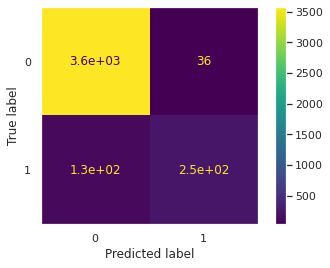

In [ ]:
cm1 = confusion_matrix(y_train,pred_train)
print(cm1)
plot_confusion_matrix(model, X_train_sc, y_train)

**Key to this step:** Plot the condusion Matrix on the Train: from here we see that there were 130 people who were predicted as negative but in reality are Personal Loan takers in order to maximize the opportunity we need to reduce this number.

[[893  11]
 [ 29  67]]


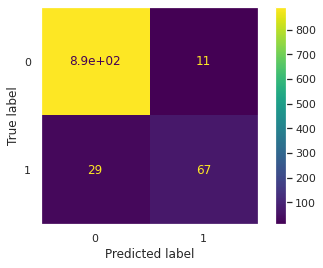

In [ ]:
cm1 = confusion_matrix(y_test,pred_test)
print(cm1)
plot_confusion_matrix(model, X_test_sc, y_test)

**Key to this step:** Plot the condusion Matrix on the Test: from here we see that there were 29 people who were predicted as negative but in reality are Personal Loan takers in order to maximize the opportunity we need to reduce this number. We are missing about 3% of the opportunity with this current model. 

**7. Perform Decision Tree**

In [ ]:
df_Copy.drop(columns=["Age_Grouped", "ZIP_Code","County",'Experience','Income_Grouped','CCAvg_Grouped','City'], inplace=True)

**Key to this step:** Use the copy of the dataframe to build a decision tree model. I will be dropping the grouped columns in addition to the city , county and zip code columns and using only the region column for this analysis in terms of customer location. 

In [ ]:
X_Copy = df_Copy.drop('Personal_Loan', axis=1)
y_Copy = df_Copy['Personal_Loan']

**Key to this step:** Define the features and the target variable.

In [ ]:
dummycol2=X_Copy.select_dtypes(exclude='number').columns.to_list()
X_Copy=pd.get_dummies(X_Copy,columns=dummycol2,drop_first=True)
X_train_Copy, X_test_Copy, y_train_Copy, y_test_Copy = train_test_split(X_Copy, y_Copy, test_size=0.2, random_state=42)

**Key to this step:** Create dummies for the family column, and the regions column and split the data into train and test set by selecting 20% cutoff for the test data set size.

In [ ]:
X_Copy.head()

,Age,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Regions_Central,Regions_Los Angeles,Regions_Southern,Regions_Superior
0,25,49,1.6,0,0,0,1,0,0,1,0,0,0,0,1,0,0
1,45,34,1.5,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,39,11,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,100,2.7,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,35,45,1.0,0,0,0,1,1,0,0,0,0,1,0,1,0,0


**Key to this step:** Check what the data looks like after the dummies formation to ensure that there are no abnormalities.

In [ ]:
def get_recall_score(model):

    ytrain_predict = model.predict(X_train_Copy)
    ytest_predict = model.predict(X_test_Copy)
    print("Accuracy : Train :", model.score(X_train_Copy,y_train_Copy), 'Test:',  model.score(X_test_Copy,y_test_Copy))
    print("Recall   : Train :", metrics.recall_score(y_train_Copy,ytrain_predict),"Test:", metrics.recall_score(y_test_Copy,ytest_predict))

**Key to this step:** Define a function to check the accuracy and recall scores

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_Copy, y_train_Copy)
ytrain_predict = model.predict(X_train_Copy)
ytest_predict = model.predict(X_test_Copy)
get_recall_score(model)


Accuracy : Train : 1.0 Test: 0.988
Recall   : Train : 1.0 Test: 0.9333333333333333


**Key to this step:** The recall value on the test versus the recall value of the train suggests that there is an overfitting which needs to be addressed. 

In [ ]:
confusion_matrix(y_train_Copy,ytrain_predict)

array([[3625,    0],
       [   0,  375]])

**Key to this step:** Seek the confusion matrix scores in order to study the model. According to the model there are 0 false postive or negative on the train set which needs to be studied as it is unlikely. 

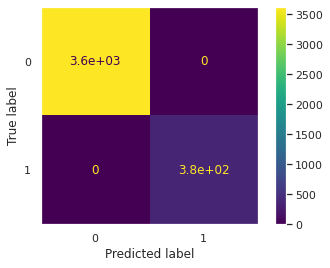

In [ ]:
plot_confusion_matrix(model, X_train_Copy, y_train_Copy)

**Key to this step:** Visualize the confision matrix. As described earlier there are 0 false +/- and most of the cases are identified as true negatives

In [ ]:
confusion_matrix(y_test_Copy,ytest_predict)

array([[890,   5],
       [  7,  98]])

**Key to this step:** Seek the confusion matrix scores of the test set. Here we see that the test set performs worse that the train set indicating that there really is some overfitting going on. 

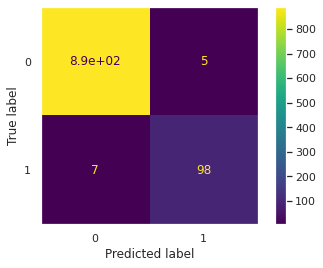

In [ ]:
plot_confusion_matrix(model, X_test_Copy, y_test_Copy)

**Key to this step:** Visualize the test in a confuusion matrix. There are approximately 12 recordsd that are misidentified versus the train set that had 0. While the recall metric that we are seeking to maximize is high for the model we need to address the overfitting. 

In [ ]:
columns = list(X_Copy.columns)
features = columns
print(features)

['Age', 'Income', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1', 'Regions_Central', 'Regions_Los Angeles', 'Regions_Southern', 'Regions_Superior']


**Key to this step:** Define the column names for the decision tree model.

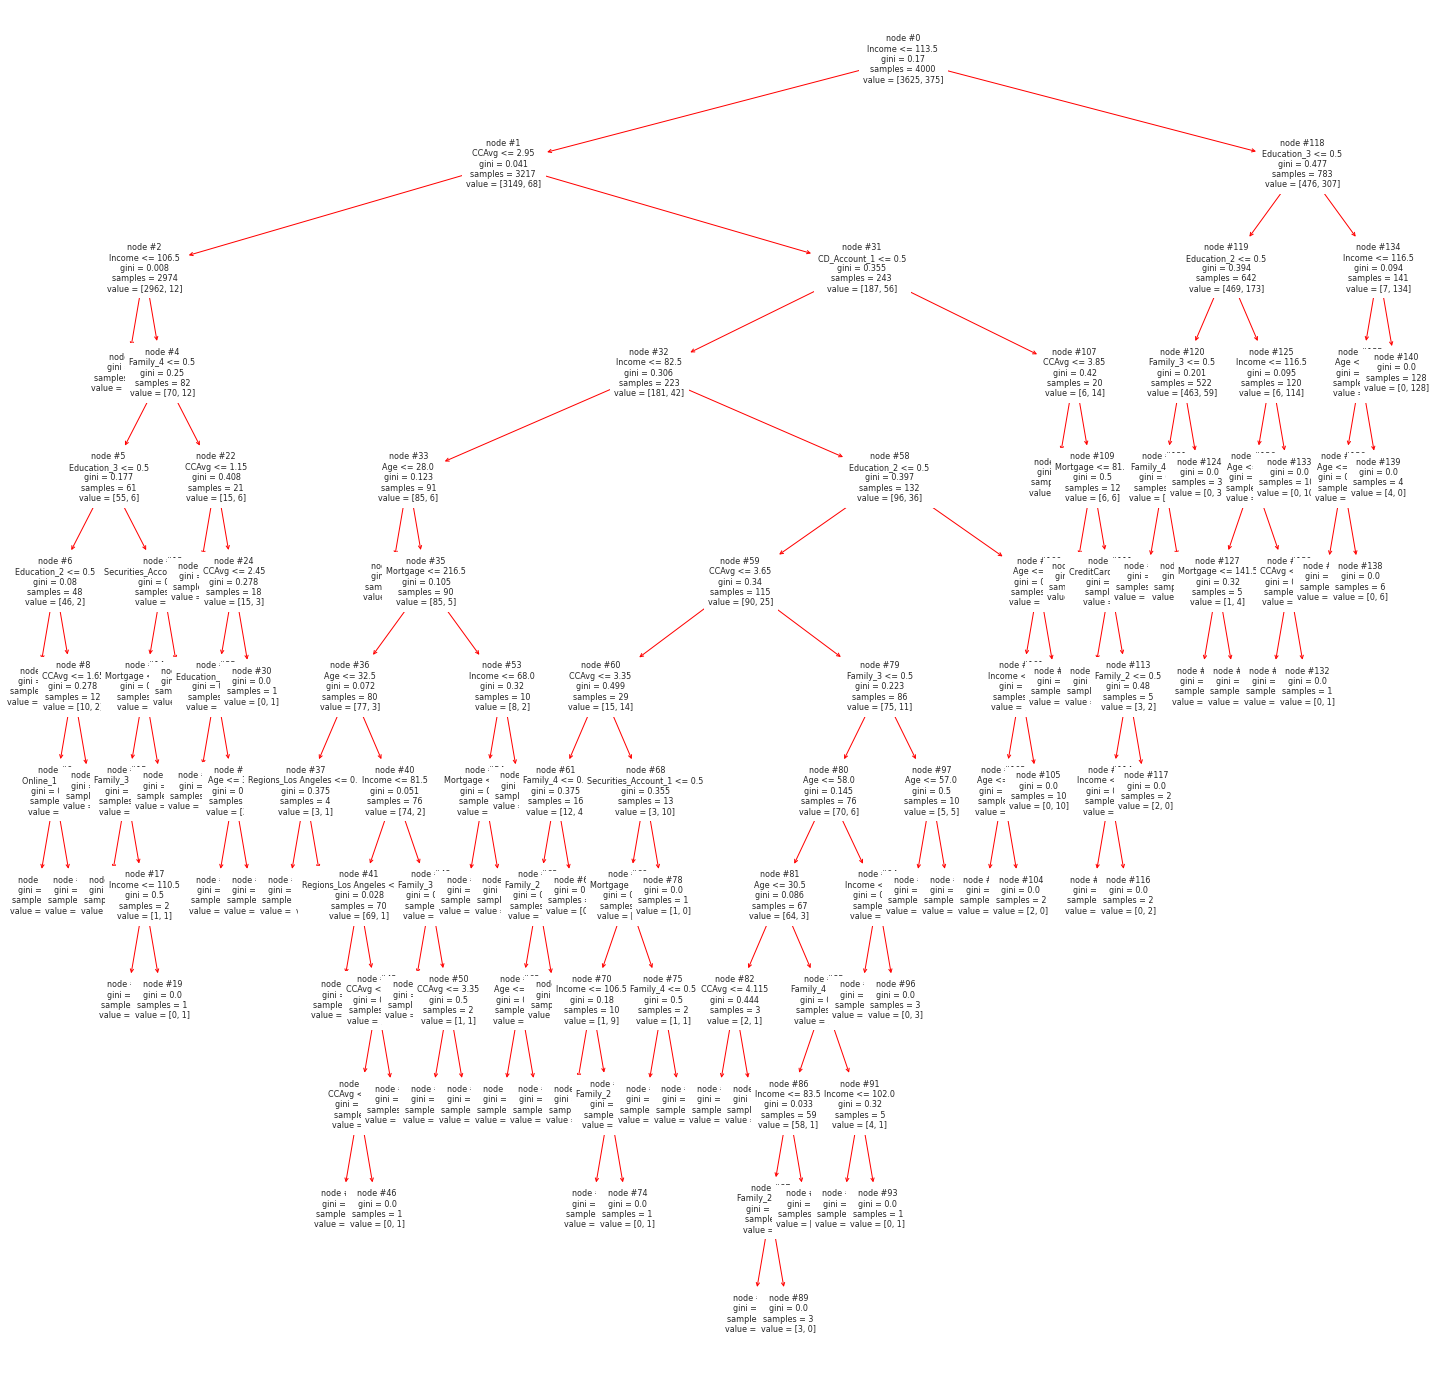

In [ ]:
plt.figure(figsize=(25,25))
from sklearn import tree
from sklearn.model_selection import GridSearchCV
tree_graph = tree.plot_tree(model,feature_names=features,node_ids=True,fontsize=8)
for branch in tree_graph:
     arrow = branch.arrow_patch
     if arrow is not None:
      arrow.set_edgecolor('red')
plt.show()

**Key to this step:** Visualize the decision tree.

In [ ]:
print(tree.export_text(model,feature_names=features,show_weights=True,max_depth=6,decimals=1))

|--- Income <= 113.5
|   |--- CCAvg <= 3.0
|   |   |--- Income <= 106.5
|   |   |   |--- weights: [2892.0, 0.0] class: 0
|   |   |--- Income >  106.5
|   |   |   |--- Family_4 <= 0.5
|   |   |   |   |--- Education_3 <= 0.5
|   |   |   |   |   |--- Education_2 <= 0.5
|   |   |   |   |   |   |--- weights: [36.0, 0.0] class: 0
|   |   |   |   |   |--- Education_2 >  0.5
|   |   |   |   |   |   |--- CCAvg <= 1.7
|   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |--- CCAvg >  1.7
|   |   |   |   |   |   |   |--- weights: [9.0, 0.0] class: 0
|   |   |   |   |--- Education_3 >  0.5
|   |   |   |   |   |--- Securities_Account_1 <= 0.5
|   |   |   |   |   |   |--- Mortgage <= 231.0
|   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |--- Mortgage >  231.0
|   |   |   |   |   |   |   |--- weights: [0.0, 1.0] class: 1
|   |   |   |   |   |--- Securities_Account_1 >  0.5
|   |   |   |   |   |   |--- weights: [0.0, 2.0] class: 1
| 

**Key to this step:** Get a text report of the decision tree as well

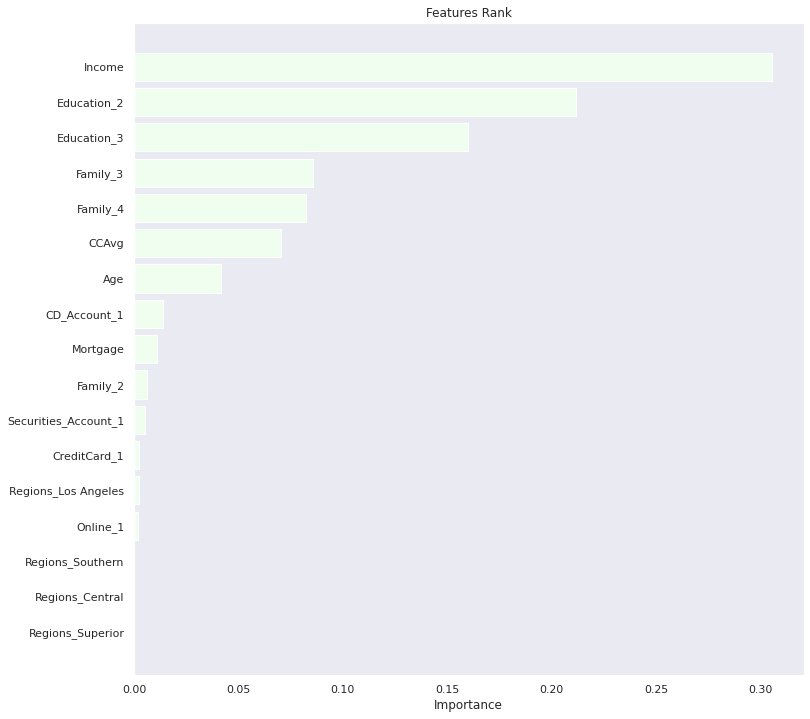

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Features Rank')
plt.barh(range(len(indices)), importances[indices], color = '#effeef')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.show()

**Key to this step:** Print a visual of the most important features of the model:

As previously observed 

1. Income 
2. Education 

are the top two indicators that a person will take a personal loan. Followed by 

1. Family size 
2. CC Avg 

One difference here is that compared to the log regression CD Account is not as important as indicated by the regression model.

In [ ]:
estimator = DecisionTreeClassifier(random_state=42)

parameters = {'max_depth': np.arange(1,20), 'max_features': ['auto', 'log2'], 'min_samples_leaf': [1, 2, 4, 8, 16, 32], 'max_leaf_nodes' : [5, 10,15,20,25,30, 35],'base_estimator__max_depth': [2, 4, 6, 8,10,12]}         

acc_scorer = metrics.make_scorer(metrics.recall_score)
drid_obj = GridSearchCV(estimator, parameters , cv = 10, n_jobs = 1, verbose = 0, return_train_score=True,)
grid_obj = grid_obj.fit(X_train_Copy, y_train_Copy)

estimator = grid_obj.best_estimator_
estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

**Key to this step:**  I will try to use hyperarameter tuning in order to improve the recall on the test and select the best parameters where the performance of the model is best and the error rate is least.


In [ ]:
estimator.fit(X_train_Copy, y_train_Copy)
ytrain_predict=estimator.predict(X_train_Copy)
ytest_predict=estimator.predict(X_test_Copy)

**Key to this step:**  Obtain the predited values from the hyperparameter tuning of the Decision Tree

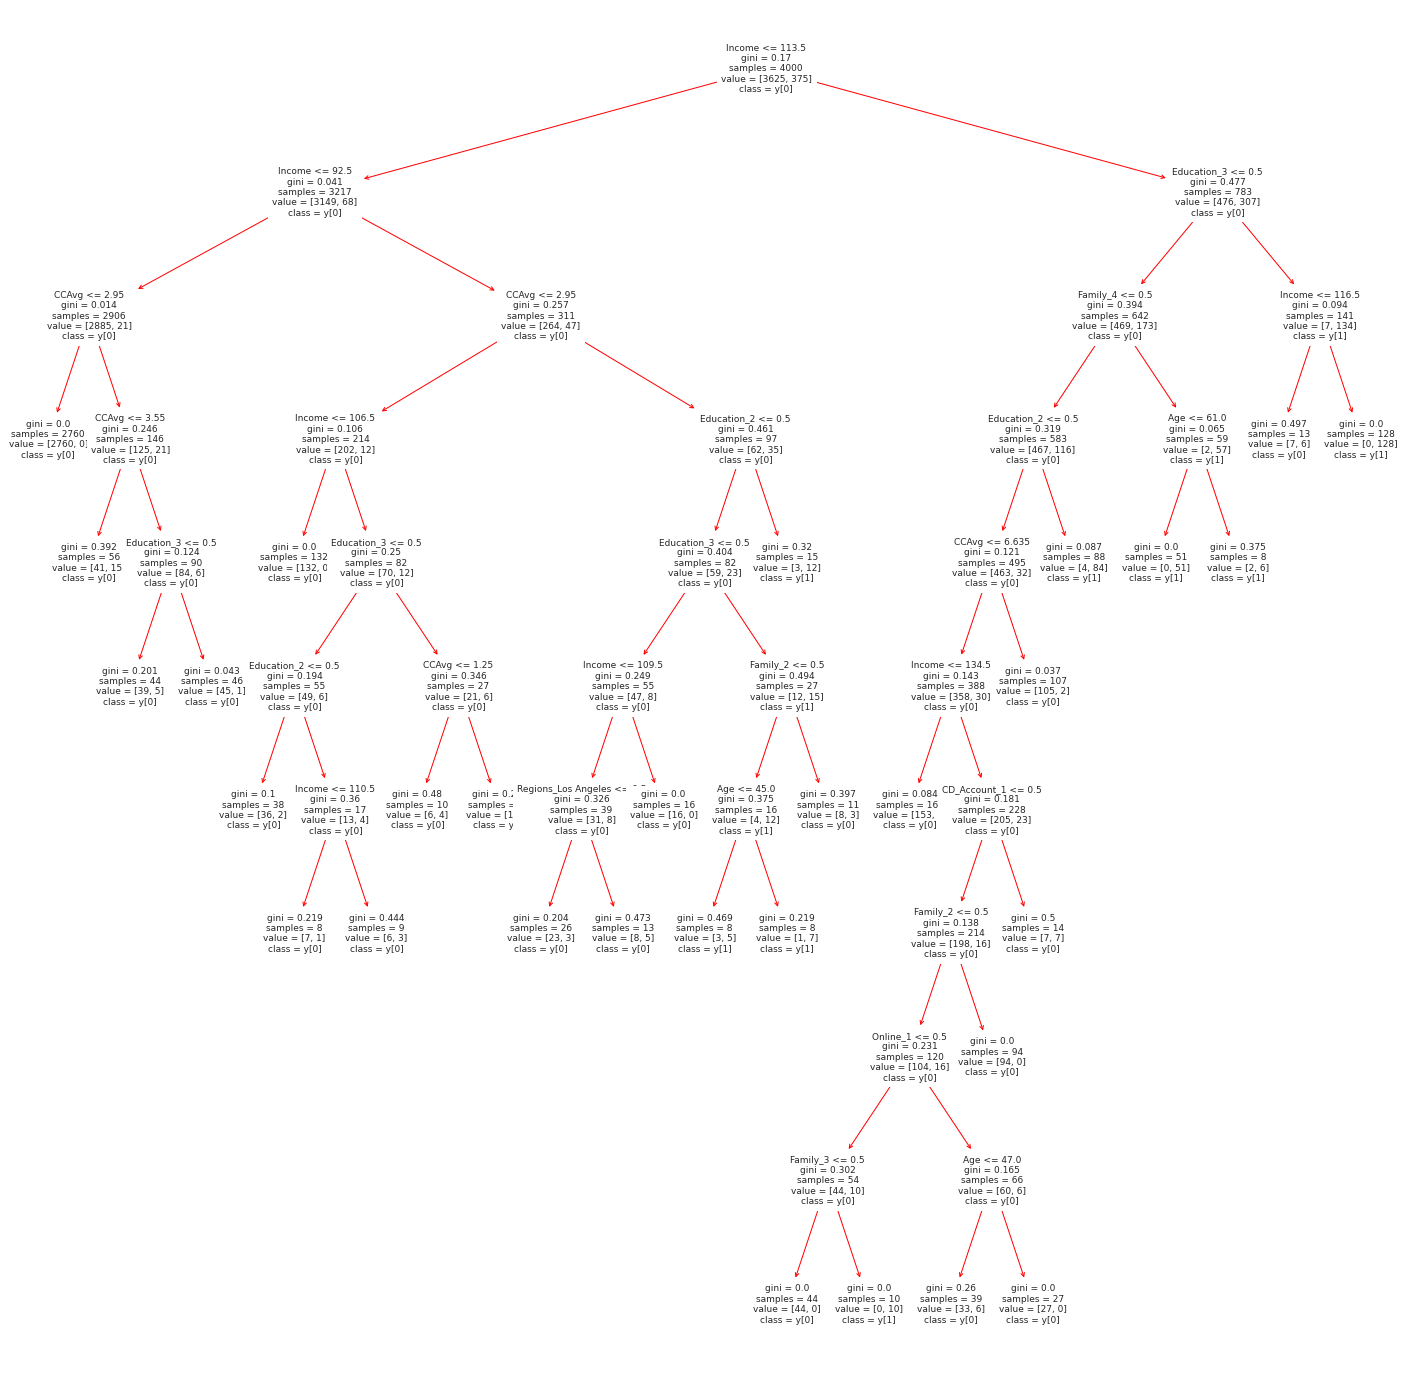

In [ ]:
plt.figure(figsize=(25,25))

tree_graph2 = tree.plot_tree(estimator,feature_names=features,fontsize=9,node_ids=False,class_names=True)
for branch in tree_graph2:
    arrow = branch.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
plt.show()

**Key to this step:**  Visualize the new decision tree with hyperparameter tuning.

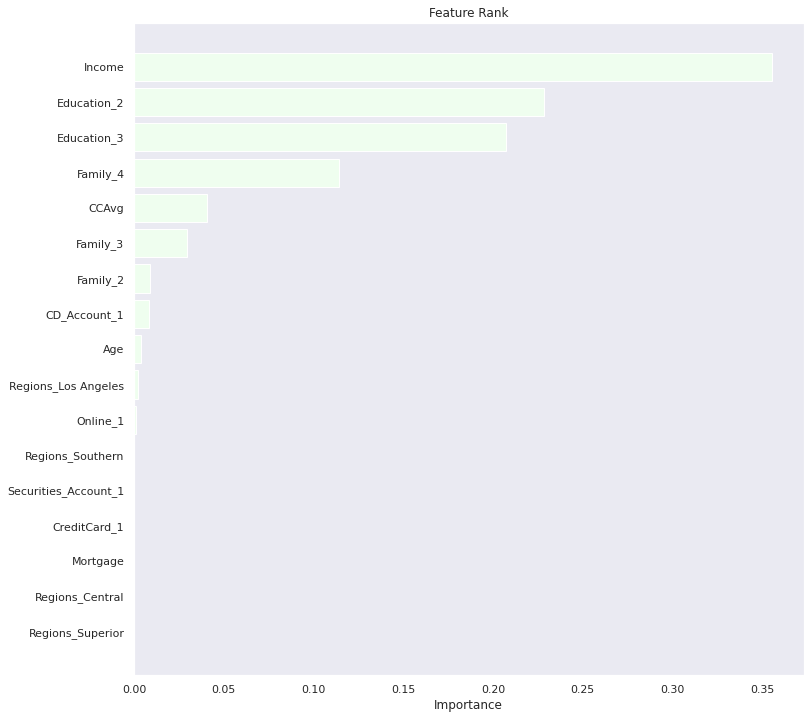

In [ ]:
importances2 = estimator.feature_importances_
indices2 = np.argsort(importances2)

plt.figure(figsize=(12,12))
plt.title('Feature Rank')
plt.barh(range(len(indices2)), importances2[indices2], color = '#effeef')
plt.yticks(range(len(indices2)), [features[i] for i in indices2])
plt.xlabel('Importance')
plt.show()

**Key to this step:**  Visualize the new feature importance, it is evident that the single most important factor in taking on a personal loan remains Income, followed by education. Income and education are likely closely associated as well. 


In [ ]:
get_recall_score(estimator)

Accuracy : Train : 0.97875 Test: 0.984
Recall   : Train : 0.808 Test: 0.8666666666666667


**Key to this step:**  Obtain the accuracy and recall scores. While accuracy did go down significantly on the test set the recall score that we have decided to use as a benchmark of our model's success improved and it is higher than the one the linear regression yet lower than the test recall of the decision tree without the hyperparameter tuning. 


**7. Conclusions**

In [ ]:
conclusion = pd.DataFrame({'Performance':['Logisitic Regression',
                                          'Decision Tree without hyperparameter tuning',
                                          'Decision treee with hyperparameter tuning'],
                                          'Train_Accuracy' :[.96,1,.98],
                                          'Test_Accuracy' :[.96,.99,.98],
                                          'Train_Recall' :[.66,1,0.81], 
                                          'Test_Recall' :[.7,.93,.87]}) 

**Key to this step:**  Create a table to compare the results from the 3 models that were performed

In [ ]:
conclusion

,Performance,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall
0,Logisitic Regression,0.96,0.96,0.66,0.70
1,Decision Tree without hyperparameter tuning,1.00,0.99,1.00,0.93
2,Decision treee with hyperparameter tuning,0.98,0.98,0.81,0.87


**Conclusions** 
****
The herein analysis contains basic EDA, logistic regression, decision tree with and without hyperparameter in order to estimate whether customers at a major US bank will be purchasing a personal loan - a product that the bank is trying to grow. We used recall to measure the success of the model as the assumption is that we want to make sure that we are reaching out to all the customers that will be buying a loan and not missing on any opportunities to distrubute this product. The goal was to maximize recal and minimize false negatives aka. not assume that a person who would have bought a loan will not buy one. 
****
Consistently accross all models, income, education, and family size were predicted to be major indicator of whether a person will be purchasing a loan from the bank. For starters the bank should start approaching the customers with highest income, highest education and largest families first in order to strat growing their personal loan business - these are the groups that will most likely respond positively to the invitation. Smaller families and people less education and less income are must less likely to purchase the loan - therefore all resources and efforts in this task should be focused on the groups that will likely be pruchasing the loan. 
****
Although the decision tree has a level of overfitting I will select this model for the estimation of customers as it had the highest recall score. I will continue to find ways to improve the recall of the regression model and the decision tree post hyper-parametarization while utilizing the decision tree model to start growing the personal loan side of the business. 